In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)
sys.path.insert(0, os.path.join(project_root, 'src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from src.data.data_loader import YahooDataLoader
from config.settings import DataConfig

plt.rcParams['figure.figsize'] = (18, 12)

# Data Preparation

In [2]:
data_config = DataConfig(
    timeframes=["1h"],
    symbols=["SPY"],
    cache_enabled=True,
    cache_dir="../data/cache"
)

data_loader = YahooDataLoader(data_config)

end_date = datetime.now()
start_date = end_date - timedelta(days=365)

print(f"Loading price data for SPY from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

Loading price data for SPY from 2024-09-14 to 2025-09-14


In [7]:
symbol = "SPY"
timeframe = "1h"

try:
    spy_prices_df = data_loader.load_data(
        symbol=symbol,
        start_date=start_date,
        end_date=end_date,
        timeframe=timeframe
    )
    
    print(f"Successfully loaded {len(spy_prices_df)} rows of {timeframe} data for {symbol}")
    print(f"Date range: {spy_prices_df.index.min()} to {spy_prices_df.index.max()}")
    print(f"\nData shape: {spy_prices_df.shape}")
    print(f"\nColumns: {list(spy_prices_df.columns)}")
    
except Exception as e:
    print(f"Error loading data: {e}")

Successfully loaded 1731 rows of 1h data for SPY
Date range: 2024-09-16 09:30:00-04:00 to 2025-09-12 15:30:00-04:00

Data shape: (1731, 8)

Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits', 'capital gains']


In [8]:
spy_prices_df.head()

,open,high,low,close,volume,dividends,stock splits,capital gains
Datetime,,,,,,,,
2024-09-16 09:30:00-04:00,561.750000,562.919983,560.859985,561.478821,6951743,0.0,0.0,0.0
2024-09-16 10:30:00-04:00,560.909973,561.539978,559.900024,560.830017,5125936,0.0,0.0,0.0
2024-09-16 11:30:00-04:00,560.820007,561.419983,560.340027,561.389893,3354915,0.0,0.0,0.0
2024-09-16 12:30:00-04:00,561.380005,561.909973,560.789978,561.715027,3311704,0.0,0.0,0.0
2024-09-16 13:30:00-04:00,561.710022,562.599976,561.609985,562.549988,3520039,0.0,0.0,0.0


In [9]:
spy_prices_df.describe()

,open,high,low,close,volume,dividends,stock splits,capital gains
count,1731.000000,1731.000000,1731.000000,1731.000000,1.731000e+03,1731.000000,1731.0,1731.0
mean,593.106973,594.278229,591.921879,593.129957,7.696235e+06,0.004142,0.0,0.0
std,30.334463,29.751906,30.750347,30.316240,5.299099e+06,0.086223,0.0,0.0
min,489.190002,497.589996,481.799988,493.790009,1.422477e+06,0.000000,0.0,0.0
25%,572.884979,574.104980,571.872894,572.889984,4.466555e+06,0.000000,0.0,0.0
50%,593.864990,595.159973,592.679993,593.895020,6.508879e+06,0.000000,0.0,0.0
75%,607.700012,608.279999,607.134979,607.709930,9.436520e+06,0.000000,0.0,0.0
max,658.505005,659.109985,658.070007,658.505005,9.226401e+07,1.966000,0.0,0.0


In [11]:
spy_returns_df = pd.DataFrame(index=spy_prices_df.index)

spy_returns_df['open_return'] = spy_prices_df['open'].pct_change() * 100
spy_returns_df['high_return'] = spy_prices_df['high'].pct_change() * 100
spy_returns_df['low_return'] = spy_prices_df['low'].pct_change() * 100
spy_returns_df['close_return'] = spy_prices_df['close'].pct_change() * 100

spy_returns_df['intrabar_return'] = ((spy_prices_df['high'] - spy_prices_df['low']) / spy_prices_df['open']) * 100

spy_returns_df['body_return'] = ((spy_prices_df['close'] - spy_prices_df['open']) / spy_prices_df['open']) * 100

spy_returns_df = spy_returns_df.dropna()

print(f"Returns data shape: {spy_returns_df.shape}")

Returns data shape: (1730, 6)


In [12]:
spy_returns_df.head()

,open_return,high_return,low_return,close_return,intrabar_return,body_return
Datetime,,,,,,
2024-09-16 10:30:00-04:00,-0.149537,-0.245151,-0.171159,-0.115553,0.292374,-0.014255
2024-09-16 11:30:00-04:00,-0.016039,-0.021369,0.078586,0.099830,0.192567,0.101616
2024-09-16 12:30:00-04:00,0.099853,0.087277,0.080300,0.057916,0.199507,0.059678
2024-09-16 13:30:00-04:00,0.058787,0.122796,0.146224,0.148645,0.176246,0.149537
2024-09-16 14:30:00-04:00,0.147755,0.021329,0.040961,-0.051547,0.156423,-0.049769


In [13]:
spy_returns_df.describe()

,open_return,high_return,low_return,close_return,intrabar_return,body_return
count,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000
mean,0.010139,0.009832,0.010110,0.010053,0.407870,0.004661
std,0.443746,0.397052,0.440774,0.433127,0.416485,0.333041
min,-4.179969,-3.126474,-4.605395,-3.971065,0.063532,-2.271798
25%,-0.124788,-0.096909,-0.112939,-0.115333,0.195933,-0.113575
50%,0.018200,0.006547,0.020989,0.013581,0.294406,0.009932
75%,0.152708,0.110504,0.148221,0.140680,0.486375,0.129707
max,4.974061,6.562788,4.873161,4.947324,8.456836,4.962042


### Price Data Visualizations

Let's visualize the price data to understand the distribution and patterns.

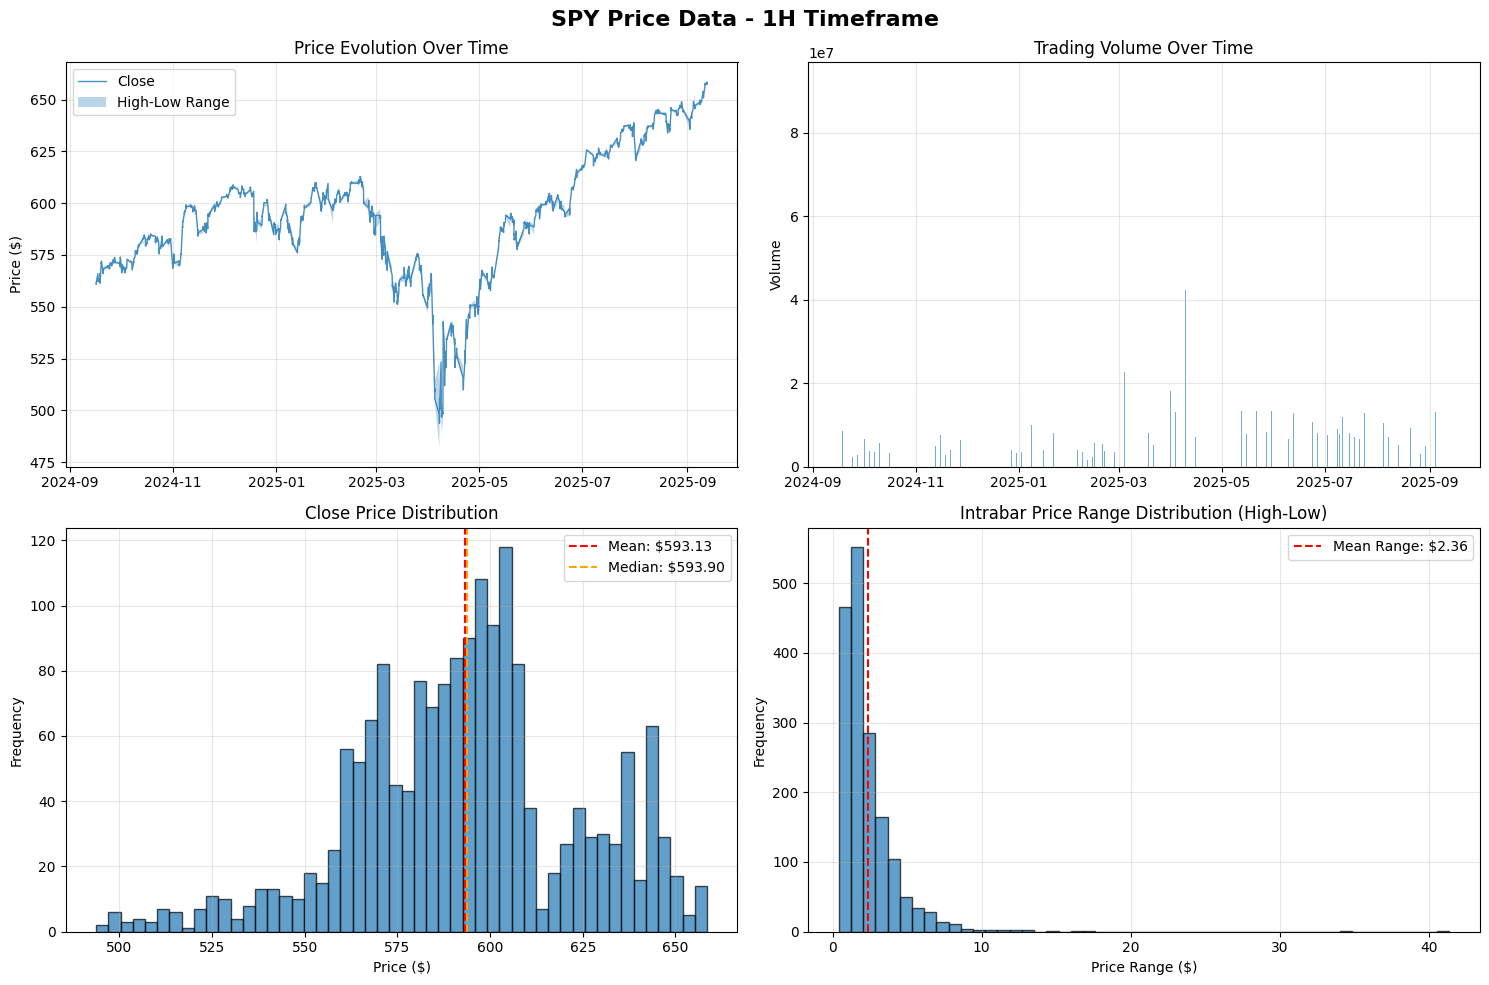

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'{symbol} Price Data - 1H Timeframe', fontsize=16, fontweight='bold')

axes[0, 0].plot(spy_prices_df.index, spy_prices_df['close'], label='Close', alpha=0.8, linewidth=1)
axes[0, 0].fill_between(spy_prices_df.index, spy_prices_df['low'], spy_prices_df['high'], 
                       alpha=0.3, label='High-Low Range')
axes[0, 0].set_title('Price Evolution Over Time')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].bar(spy_prices_df.index, spy_prices_df['volume'], alpha=0.6, width=0.02)
axes[0, 1].set_title('Trading Volume Over Time')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(spy_prices_df['close'], bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].axvline(spy_prices_df['close'].mean(), color='red', linestyle='--', 
                  label=f'Mean: ${spy_prices_df["close"].mean():.2f}')
axes[1, 0].axvline(spy_prices_df['close'].median(), color='orange', linestyle='--', 
                  label=f'Median: ${spy_prices_df["close"].median():.2f}')
axes[1, 0].set_title('Close Price Distribution')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

price_range = spy_prices_df['high'] - spy_prices_df['low']
axes[1, 1].hist(price_range, bins=50, alpha=0.7, edgecolor='black')
axes[1, 1].axvline(price_range.mean(), color='red', linestyle='--', 
                  label=f'Mean Range: ${price_range.mean():.2f}')
axes[1, 1].set_title('Intrabar Price Range Distribution (High-Low)')
axes[1, 1].set_xlabel('Price Range ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
print(f"Price Statistics for {symbol}:")
print(f"Close Price - Mean: ${spy_prices_df['close'].mean():.2f}, Std: ${spy_prices_df['close'].std():.2f}")
print(f"Price Range - Mean: ${price_range.mean():.2f}, Std: ${price_range.std():.2f}")
print(f"Volume - Mean: {spy_prices_df['volume'].mean():,.0f}, Std: {spy_prices_df['volume'].std():,.0f}")

Price Statistics for SPY:
Close Price - Mean: $593.13, Std: $30.32
Price Range - Mean: $2.36, Std: $2.16
Volume - Mean: 7,696,235, Std: 5,299,099


### Returns Data Visualizations

Now let's analyze the distribution of returns to understand the risk-return characteristics.

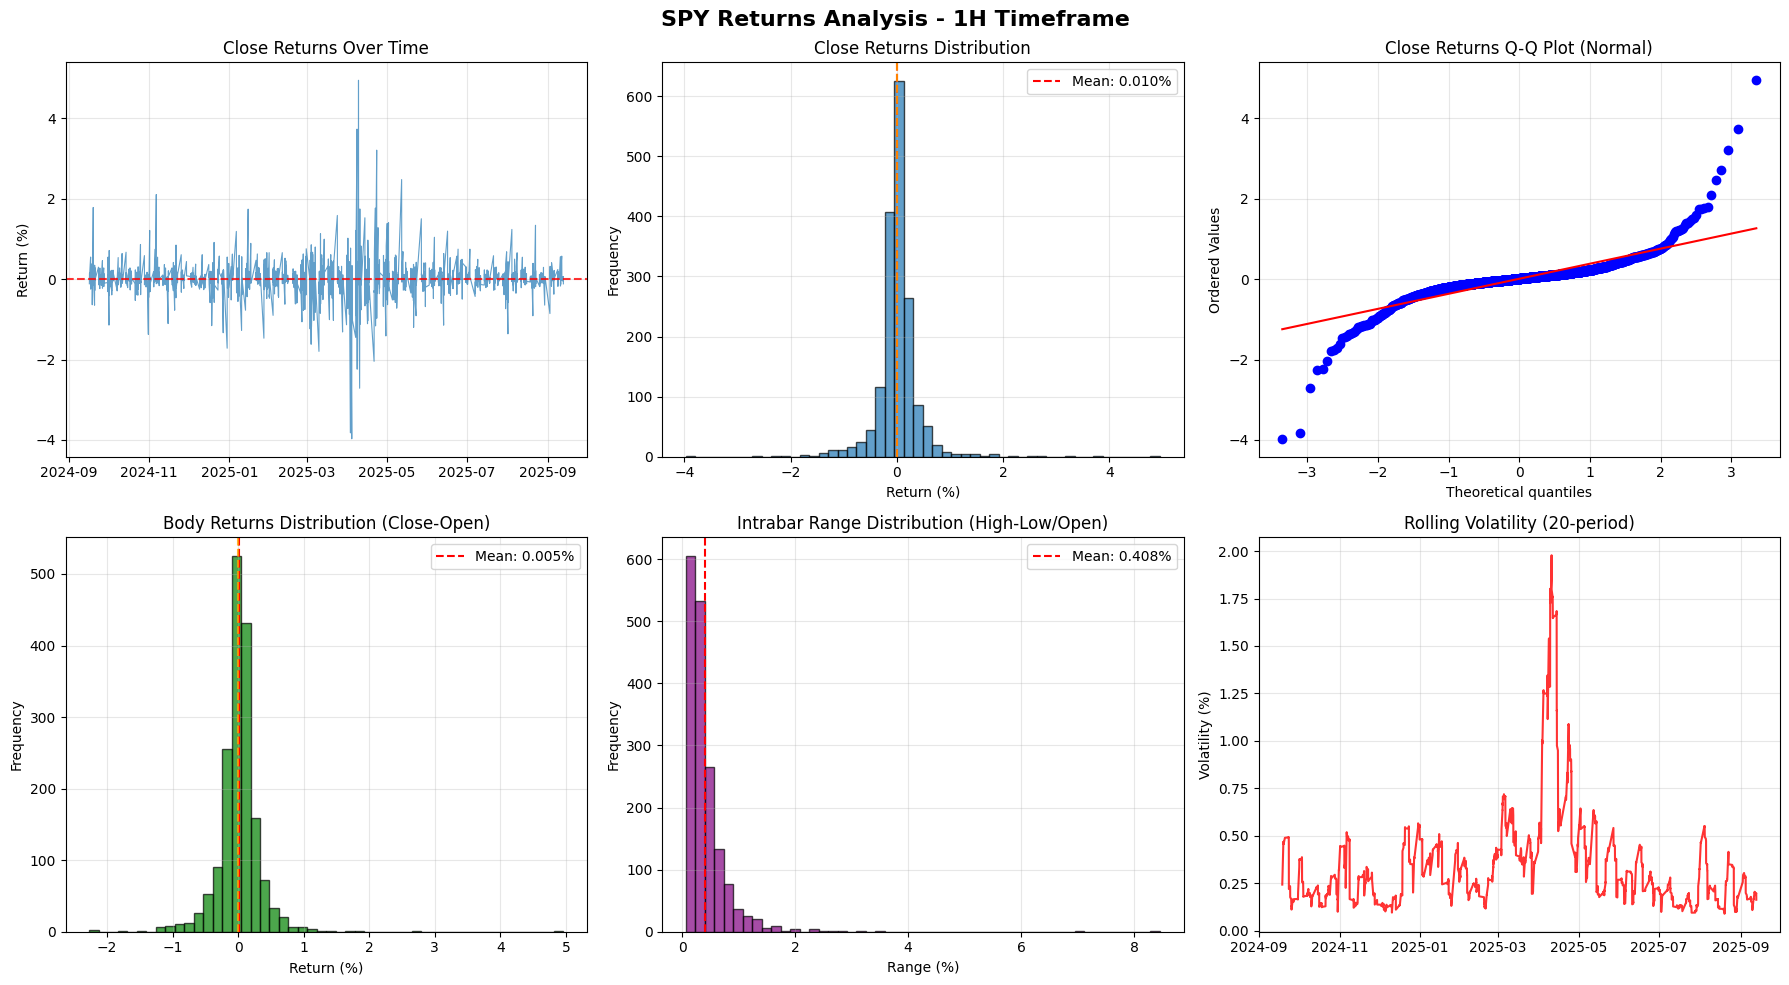

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(f'{symbol} Returns Analysis - 1H Timeframe', fontsize=16, fontweight='bold')

axes[0, 0].plot(spy_returns_df.index, spy_returns_df['close_return'], alpha=0.7, linewidth=0.8)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[0, 0].set_title('Close Returns Over Time')
axes[0, 0].set_ylabel('Return (%)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(spy_returns_df['close_return'], bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].axvline(spy_returns_df['close_return'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {spy_returns_df["close_return"].mean():.3f}%')
axes[0, 1].axvline(0, color='orange', linestyle='--', alpha=0.8)
axes[0, 1].set_title('Close Returns Distribution')
axes[0, 1].set_xlabel('Return (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

from scipy import stats
stats.probplot(spy_returns_df['close_return'].dropna(), dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Close Returns Q-Q Plot (Normal)')
axes[0, 2].grid(True, alpha=0.3)

axes[1, 0].hist(spy_returns_df['body_return'], bins=50, alpha=0.7, edgecolor='black', color='green')
axes[1, 0].axvline(spy_returns_df['body_return'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {spy_returns_df["body_return"].mean():.3f}%')
axes[1, 0].axvline(0, color='orange', linestyle='--', alpha=0.8)
axes[1, 0].set_title('Body Returns Distribution (Close-Open)')
axes[1, 0].set_xlabel('Return (%)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(spy_returns_df['intrabar_return'], bins=50, alpha=0.7, edgecolor='black', color='purple')
axes[1, 1].axvline(spy_returns_df['intrabar_return'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {spy_returns_df["intrabar_return"].mean():.3f}%')
axes[1, 1].set_title('Intrabar Range Distribution (High-Low/Open)')
axes[1, 1].set_xlabel('Range (%)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

rolling_vol = spy_returns_df['close_return'].rolling(window=20).std()
axes[1, 2].plot(rolling_vol.index, rolling_vol, alpha=0.8, color='red')
axes[1, 2].set_title('Rolling Volatility (20-period)')
axes[1, 2].set_ylabel('Volatility (%)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
close_returns = spy_returns_df['close_return']
body_returns = spy_returns_df['body_return']
intrabar_returns = spy_returns_df['intrabar_return']

In [20]:
print(f"1. CLOSE RETURNS STATISTICS:")
print(f"   Mean Return: {close_returns.mean():.4f}%")
print(f"   Std Deviation: {close_returns.std():.4f}%")
print(f"   Skewness: {close_returns.skew():.4f}")
print(f"   Kurtosis: {close_returns.kurtosis():.4f}")
print(f"   Min Return: {close_returns.min():.4f}%")
print(f"   Max Return: {close_returns.max():.4f}%")
print(f"   Sharpe Ratio (assuming 252*24 periods/year): {(close_returns.mean() / close_returns.std()) * np.sqrt(252*24):.4f}")

1. CLOSE RETURNS STATISTICS:
   Mean Return: 0.0101%
   Std Deviation: 0.4331%
   Skewness: 0.4656
   Kurtosis: 26.9264
   Min Return: -3.9711%
   Max Return: 4.9473%
   Sharpe Ratio (assuming 252*24 periods/year): 1.8051


In [21]:
print(f"2. BODY RETURNS STATISTICS (Close-Open):")
print(f"   Mean Return: {body_returns.mean():.4f}%")
print(f"   Std Deviation: {body_returns.std():.4f}%")
print(f"   Skewness: {body_returns.skew():.4f}")
print(f"   Kurtosis: {body_returns.kurtosis():.4f}")

2. BODY RETURNS STATISTICS (Close-Open):
   Mean Return: 0.0047%
   Std Deviation: 0.3330%
   Skewness: 1.7324
   Kurtosis: 35.6094


In [22]:
print(f"3. INTRABAR RANGE STATISTICS (High-Low/Open):")
print(f"   Mean Range: {intrabar_returns.mean():.4f}%")
print(f"   Std Deviation: {intrabar_returns.std():.4f}%")
print(f"   Min Range: {intrabar_returns.min():.4f}%")
print(f"   Max Range: {intrabar_returns.max():.4f}%")

3. INTRABAR RANGE STATISTICS (High-Low/Open):
   Mean Range: 0.4079%
   Std Deviation: 0.4165%
   Min Range: 0.0635%
   Max Range: 8.4568%


In [23]:
print(f"4. RISK METRICS:")
print(f"   Value at Risk (1%): {np.percentile(close_returns, 1):.4f}%")
print(f"   Value at Risk (5%): {np.percentile(close_returns, 5):.4f}%")
print(f"   Expected Shortfall (1%): {close_returns[close_returns <= np.percentile(close_returns, 1)].mean():.4f}%")
print(f"   Expected Shortfall (5%): {close_returns[close_returns <= np.percentile(close_returns, 5)].mean():.4f}%")

4. RISK METRICS:
   Value at Risk (1%): -1.2660%
   Value at Risk (5%): -0.5267%
   Expected Shortfall (1%): -1.9411%
   Expected Shortfall (5%): -1.0574%


In [24]:
print(f"5. DISTRIBUTION ANALYSIS:")
positive_returns = (close_returns > 0).sum()
negative_returns = (close_returns < 0).sum()
zero_returns = (close_returns == 0).sum()
total_returns = len(close_returns)

print(f"   Positive Returns: {positive_returns} ({positive_returns/total_returns*100:.1f}%)")
print(f"   Negative Returns: {negative_returns} ({negative_returns/total_returns*100:.1f}%)")
print(f"   Zero Returns: {zero_returns} ({zero_returns/total_returns*100:.1f}%)")
print(f"   Win Rate: {positive_returns/(positive_returns+negative_returns)*100:.1f}%")

if positive_returns > 0 and negative_returns > 0:
    avg_win = close_returns[close_returns > 0].mean()
    avg_loss = close_returns[close_returns < 0].mean()
    profit_factor = abs(avg_win / avg_loss)
    print(f"   Average Win: {avg_win:.4f}%")
    print(f"   Average Loss: {avg_loss:.4f}%")
    print(f"   Profit Factor: {profit_factor:.4f}")

5. DISTRIBUTION ANALYSIS:
   Positive Returns: 914 (52.8%)
   Negative Returns: 812 (46.9%)
   Zero Returns: 4 (0.2%)
   Win Rate: 53.0%
   Average Win: 0.2356%
   Average Loss: -0.2437%
   Profit Factor: 0.9665
